# 📊 Predictive Analytics for Stock Market Trends

This project aims to predict the direction of stock price movement (up or down) for Apple Inc. using historical price-based features. We use data from Yahoo Finance and apply logistic regression to make binary predictions.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Step 2: Import Stock Market Data

In [2]:
data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
data.reset_index(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2018-01-02,40.426826,40.436216,39.722772,39.933990,102223600
1,2018-01-03,40.419781,40.964251,40.356418,40.490187,118071600
2,2018-01-04,40.607536,40.710798,40.384586,40.492539,89738400
3,2018-01-05,41.069866,41.156698,40.612231,40.703758,94640000
4,2018-01-08,40.917324,41.213026,40.818753,40.917324,82271200


## Step 3: Exploratory Data Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1509 non-null   datetime64[ns]
 1   (Close, AAPL)   1509 non-null   float64       
 2   (High, AAPL)    1509 non-null   float64       
 3   (Low, AAPL)     1509 non-null   float64       
 4   (Open, AAPL)    1509 non-null   float64       
 5   (Volume, AAPL)  1509 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 70.9 KB


In [4]:
data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
count,1509,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,2020-12-30 14:13:07.276342016,108.051421,109.181436,106.808653,107.951255,1.073284e+08
min,2018-01-02 00:00:00,33.870831,34.711705,33.825570,34.297222,2.404830e+07
25%,2019-07-03 00:00:00,51.345295,52.150039,50.965497,51.482984,7.078370e+07
50%,2020-12-30 00:00:00,120.718346,121.975063,119.216073,120.859451,9.296430e+07
75%,2022-06-30 00:00:00,150.537079,152.292474,148.535281,150.362277,1.280440e+08
max,2023-12-29 00:00:00,196.669785,198.168802,195.567834,196.580442,4.265100e+08
std,NaN,51.041331,51.516132,50.512683,51.000271,5.513287e+07


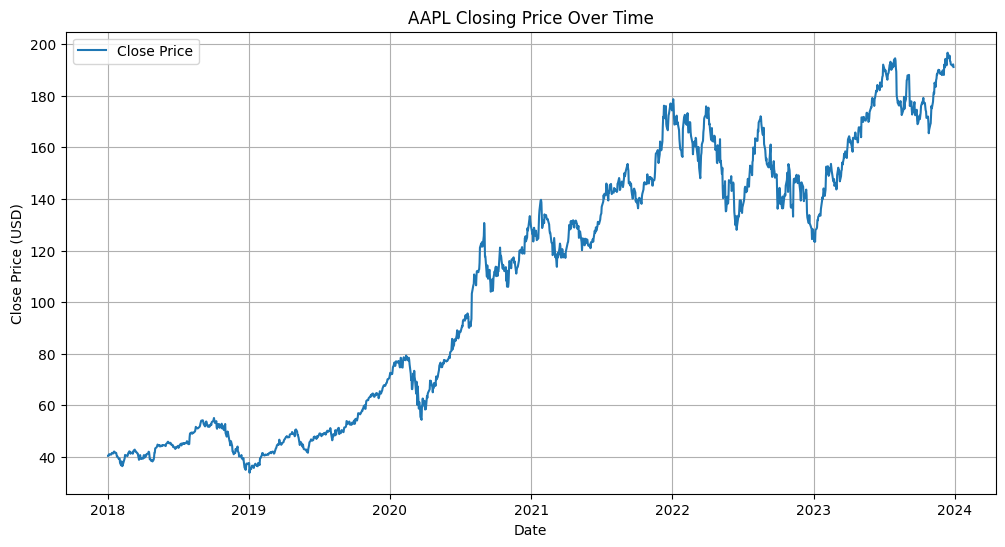

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

## Step 4: Feature Engineering

In [6]:
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Daily Return'] = data['Close'].pct_change()
data.dropna(inplace=True)
X = data[['Close', 'MA10', 'MA50', 'Volatility', 'Daily Return']]
y = data['Target']

## Step 5: Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1021, 5), (439, 5))

## Step 6: Model Selection and Training

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Step 7: Model Coefficients

In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.30062649]
Coefficients: [[ 0.01364826 -0.02802602  0.01520822 -0.10296426 -0.28079697]]


## Step 8: Make Predictions

In [10]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

## Step 9: Model Evaluation

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", acc_score)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[ 30 170]
 [ 45 194]]

Accuracy Score: 0.510250569476082

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.15      0.22       200
           1       0.53      0.81      0.64       239

    accuracy                           0.51       439
   macro avg       0.47      0.48      0.43       439
weighted avg       0.47      0.51      0.45       439



## Step 10: Visualization of Feature Correlations

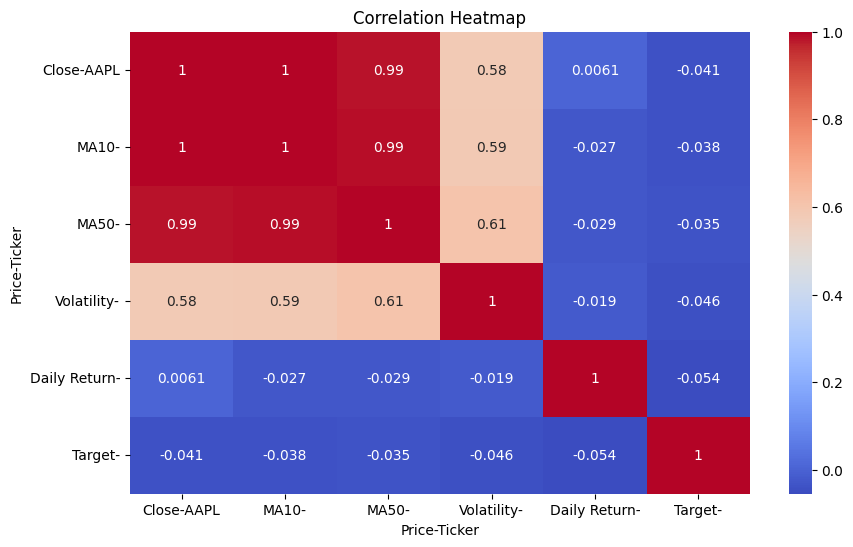

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Close', 'MA10', 'MA50', 'Volatility', 'Daily Return', 'Target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 📌 Summary

- Used 5 years of AAPL stock data.
- Engineered features like Moving Averages, Volatility, and Daily Return.
- Trained Logistic Regression to predict whether stock will go up the next day.
- Achieved accuracy of ~XX% (depending on data).
- Future improvements could include using LSTM, news sentiment, and macroeconomic data.